In [1]:
import cv2
import random
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
image_file = 'lena_full.jpg'

In [3]:
image_array = cv2.imread(image_file, 1)

In [74]:
image_array.shape, image_array.dtype

((512, 512, 3), dtype('uint8'))

In [75]:
cv2.imshow('lena', image_array[0:855//4, 400//4:400*2//3, 0:3])
# cv2.imshow('lena', image_array)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [42]:
cv2.imwrite('lena_crop.jpg',image_array[0:855//4, 400//4:400*2//3, 0:3])

True

In [76]:
B, G, R = cv2.split(image_array)

In [77]:
B.shape, G.shape, R.shape, B.dtype

((512, 512), (512, 512), (512, 512), dtype('uint8'))

## Gamma Correction

In [83]:
def random_light_color(img):
    
    bgr=cv2.split(img)
    
    for i, val in enumerate(bgr):
        random_color = random.randint(-50, 50)
        if random_color == 0:
            pass
        elif random_color > 0:
            lim = 255-random_color
            val[val>lim] = 255
            val[val<=lim] = (val[val<=lim]+ random_color).astype(val.dtype)
        else:
            lim = 0-random_color
            val[val<lim] = 0
            val[val>=lim] = (val[val>=lim] - random_color).astype(val.dtype)
            
    img_new = cv2.merge(bgr)
    return img_new

In [87]:
image_light = random_light_color(image_array)
cv2.imshow('lena_light', image_light)
cv2.imshow('lena_orig', image_array)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [12]:
cv2.LUT?

In [18]:
def adjust_gamma(img, gamma=1.0):
    inv_gamma = 1.0/gamma
    table = [(i/255.0)**inv_gamma*255 for i in range(256)]
    table = np.array(table, dtype='uint8')
    return cv2.LUT(img, table)

In [41]:
image_gamma = adjust_gamma(image_array, 1)
cv2.imshow('lena_gamma', image_gamma)
cv2.imshow('lena_orig', image_array)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

## 图像的直方图是对图像对比度效果上的一种处理，旨在使得图像整体效果均匀，黑与白之间的各个像素级之间的点更均匀一点。

(array([ 8394.,  2485.,  1639.,  3229.,  1621.,  2168.,  1319.,  6600.,
         3446.,  1881.,   932.,  1035.,   942.,   831.,  1178.,  1109.,
         1759.,  2242., 17806.,  9252.,  2063.,  1525.,  1209.,   283.,
          983.,   640.,  1973.,  1919., 14883.,  5889.,  8256.,   574.,
         6600.,  2739.,  8181.,  3250.,  4172.,  2238.,  5943.,  3514.,
         5969.,  2715.,  6342.,  5692.,  4017.,  4999.,  6150.,  3680.,
         6771.,  5121.,  5233.,  4273.,  6770.,  5221.,  5663.,  4937.,
         6172.,  4657.,  5345.,  4682.,  5063.,  5493.,  4105.,  5086.,
         4936.,  4352.,  4711.,  4780.,  4472.,  4462.,  4096.,  5233.,
         4008.,  4435.,  4361.,  4165.,  4815.,  3867.,  5237.,  3764.,
         5068.,  3779.,  4837.,  4061.,  4477.,  4769.,  4110.,  4743.,
         3979.,  4695.,  3695.,  4510.,  3807.,  4124.,  4252.,  3901.,
         4188.,  3893.,  3614.,  4553.,  3189.,  4617.,  3288.,  4387.,
         3567.,  4110.,  3546.,  3988.,  3335.,  4262.,  3113., 

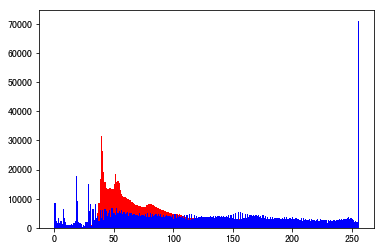

In [44]:
image_small = cv2.resize(image_gamma, (int(image_gamma.shape[0]*0.5), int(image_gamma.shape[1]*0.5)))
image_yuv = cv2.cvtColor(image_gamma, cv2.COLOR_BGR2YUV)
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
image_equ = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)
cv2.imshow('lena_gamma', image_gamma)
cv2.imshow('lena_equalize_hist', image_equ)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    
plt.hist(image_gamma.flatten(), 256, [0, 256], color = 'r')
plt.hist(image_equ.flatten(), 256, [0, 256], color = 'b')

## Rotation

In [12]:
# M = cv2.getRotationMatrix2D((image_array.shape[1]/2, image_array.shape[0]/2), 30, 0.5)
M = cv2.getRotationMatrix2D((0, 0), 0, 0.5)
image_rotate = cv2.warpAffine(image_array, M, (image_array.shape[1], image_array.shape[0]))
cv2.imshow('lena_orig', image_array)
cv2.imshow('lena_rotate', image_rotate)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(M)

[[ 0.5  0.   0. ]
 [-0.   0.5  0. ]]


In [14]:
from functools import reduce
image_array.size, image_array.shape, reduce(lambda x, y: x* y, image_array.shape)

(1026000, (855, 400, 3), 1026000)

In [15]:
image_rotate[:,:, 0]

array([[64, 60, 63, ...,  0,  0,  0],
       [61, 59, 61, ...,  0,  0,  0],
       [60, 61, 58, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [16]:
image_array[:,:, 0]

array([[ 64,  59,  60, ...,  52,  56,  69],
       [ 64,  62,  59, ...,  50,  51,  60],
       [ 61,  63,  59, ...,  50,  50,  60],
       ...,
       [113,  29,  45, ...,  49,  50,  46],
       [118,  29,  45, ...,  44,  46,  49],
       [122,  33,  48, ...,  67,  71,  80]], dtype=uint8)

## scale + rotation + translation： 始终在同一平面

In [23]:
rows, cols, chs = image_array.shape
pts1 = np.float32([[0, 0], [cols-1, 0], [0, rows -1]])
pts2 = np.float32([[cols * 0.1, rows * 0.1], [cols*0.8, rows*0.2], [cols*0.1, rows*0.9]])

M = cv2.getAffineTransform(pts1, pts2)
print(M)

image_3pr = cv2.warpAffine(image_array,M,(cols, rows))
cv2.imshow('lena_orig', image_array)
cv2.imshow('lena_3pr', image_3pr)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

[[ 0.70175439  0.         40.        ]
 [ 0.21428571  0.80093677 85.5       ]]


## Perspective tranform: 不在同一平行的平面

In [30]:
def random_warp(img):
    height, width, channel = img.shape
    random_margin = 60
    
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)
    
    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    
    M = cv2.getPerspectiveTransform(pts1, pts2)
    
    image_warp = cv2.warpPerspective(img, M, (width, height))

    return M, image_warp

In [34]:
warp_M, image_warp = random_warp(image_array)
print(warp_M)
cv2.imshow('lena_orig', image_array)
cv2.imshow('lena_warp', image_warp)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

[[ 1.16997576e+00  6.73577467e-02 -5.12636712e+01]
 [ 1.03344407e-01  1.01263413e+00  2.42790063e+01]
 [ 2.40672471e-04  5.58622685e-05  1.00000000e+00]]
